# Time Series : Modélisation et Prévision
# Prévision concentration atmosphérique CO2


Les données utilisées proviennent du dataset “Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.” (US Government’s Earth System Research Laboratory, Global Monitoring Division):

Data are reported as a dry air mole fraction defined as the number of molecules of carbon dioxide divided by the number of all molecules in air, including CO2 itself, after water vapor has been removed. The mole fraction is expressed as parts per million (ppm). 
Example: 0.000400 is expressed as 400 ppm.

Le fichier de données est co2-mm-mlo_csv.csv

On ne s'interesse ici qu'aux colonnes "date" et "average". Cette dernière contient les valeurs des concentrations de CO2.

In [1]:
# importation de toutes les librairies nécessaires
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. Chargement des données

In [2]:
from pandas import read_csv

# Importation du Dataframe avec gestion des dates
series = read_csv('co2.csv', index_col=['Date'],  parse_dates=['Date'])

# index_col=['Date'] : indique la colonne qui sert d'indexation (la date pour time series) 
# parse_dates=['Date'] : indique la colonne qui contient les dates

# On ne garde que les données de concentration de CO2 dans la colonne 'Average'
series = series.filter(items=['Average'])

# Affichages
print(series.size)
print(series.head())
print(series.tail())

#########
# Combien de mesure ? 727
# Sur quelle période? De 1958 à 2018

727
            Average
Date               
1958-03-01   315.71
1958-04-01   317.45
1958-05-01   317.50
1958-06-01   -99.99
1958-07-01   315.86
            Average
Date               
2018-05-01   411.24
2018-06-01   410.79
2018-07-01   408.71
2018-08-01   406.99
2018-09-01   405.51


# 2. Tracé des données

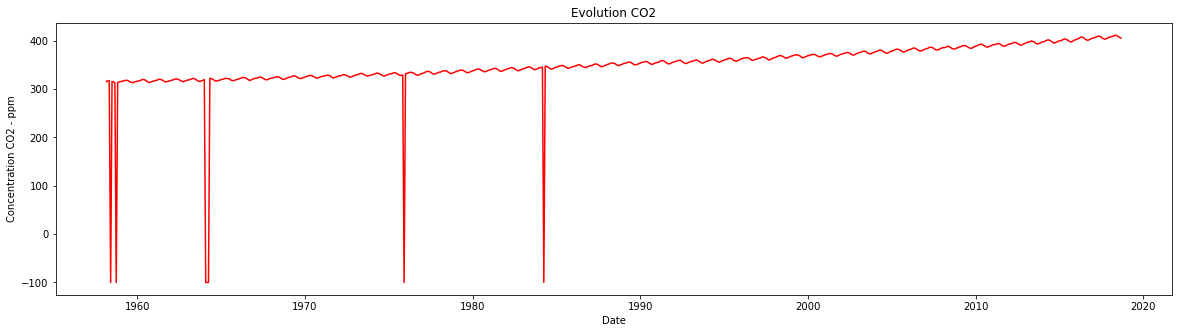

In [3]:
# Visualisation des données
plt.figure(figsize=(20,5))
plt.plot(series.index, series.Average, color='red')
plt.gca().set(title='Evolution CO2', xlabel='Date', ylabel='Concentration CO2 - ppm')
plt.show()
#########
# Qu'observe-t-on? Une courbe qui augmente lentement et qq pics dans le négatif (or concentration négative => valeurs fausses)

In [8]:
# On doit remplacer certaines données
# On va remplacer ces valeurs fausses pas la valeur précédente en les ayant au préalable remplacées par NaN
series.loc [~ (series["Average"]> 0), "Average"] = np.nan

# remplacement de NaN par valeur précédente
series = series.fillna(method='ffill')

########
# Affichez la plus Opetite valeur de la series. Quelle est sa valeur? 313.2
print(series.min())


Average    313.2
dtype: float64


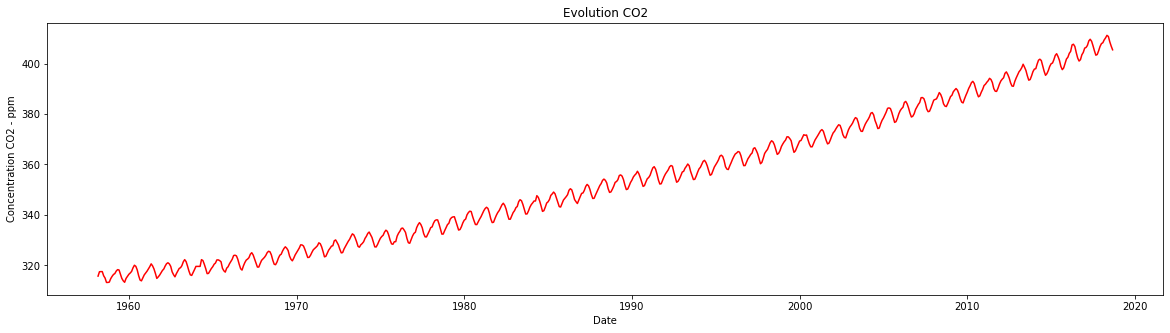

In [9]:
# Visualisation des données "corrigées"
plt.figure(figsize=(20,5))
plt.plot(series.index, series.Average, color='red')
plt.gca().set(title='Evolution CO2', xlabel='Date', ylabel='Concentration CO2 - ppm')
plt.show()

# 3. Exemple d'actions: Lissage par moyenne mobile (optionel)

             Average
Date                
1958-03-01       NaN
1958-04-01       NaN
1958-05-01       NaN
1958-06-01       NaN
1958-07-01       NaN
1958-08-01       NaN
1958-09-01       NaN
1958-10-01       NaN
1958-11-01       NaN
1958-12-01       NaN
1959-01-01       NaN
1959-02-01       NaN
1959-03-01       NaN
1959-04-01       NaN
1959-05-01       NaN
1959-06-01       NaN
1959-07-01       NaN
1959-08-01       NaN
1959-09-01       NaN
1959-10-01       NaN
1959-11-01       NaN
1959-12-01       NaN
1960-01-01       NaN
1960-02-01       NaN
1960-03-01       NaN
1960-04-01  316.7278
1960-05-01  316.8338
1960-06-01  316.8958
1960-07-01  316.9374
1960-08-01  316.9354
1960-09-01  316.9434
1960-10-01  316.9532
1960-11-01  317.0230
1960-12-01  317.1128
1961-01-01  317.2210
1961-02-01  317.3092
1961-03-01  317.3940
1961-04-01  317.4942
1961-05-01  317.6050
1961-06-01  317.6800
1961-07-01  317.7090
1961-08-01  317.7014
1961-09-01  317.6948
1961-10-01  317.7186
1961-11-01  317.7842
1961-12-01  3

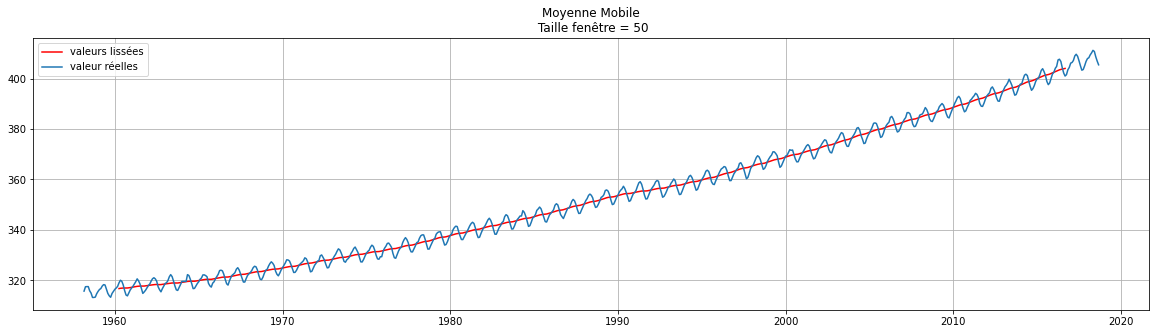

In [18]:
# OBJECTIF : TRACER SUR UNE MEME FIGURE LA SERIE INITIALE ET LA SERIE LISSEE
######
# Proposez une taille de fenêtre
# Qu'observez-vous? 
# Quelle est la dimension de la série lissée ? Y a-t-il des effets de bords ? 
# Que fait rolling.mean? 

# choix de la taille de la fenetre
fenetre = 50

series_lissee = series.rolling(window=fenetre,center=True).mean() 
plt.figure(figsize=(20,5))
plt.title("Moyenne Mobile\n Taille fenêtre = {}".format(fenetre))
plt.plot(series_lissee, "r", label="valeurs lissées")
plt.plot(series, label="valeur réelles")
plt.legend(loc="upper left")
plt.grid(True)

print(series_lissee.head(fenetre+2))
print(series_lissee.tail(fenetre+2))

# 4. Exemple d'actions: Décomposition / Déconvolution (optionel)

In [19]:
# OBJECTIFS : 
# REALISEZ UNE DECONVOLUTION SIMPLE DE TYPE ADDITIF OU DE TYPE MULTIPLICATIF
# IDENTIFIEZ LA MEILLEURE DECONVOLUTION
# QUELLE EST LA DIFFERENCE ENTRE LES DEUX?

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

series_add = seasonal_decompose(series, model='additive')
series_mult = seasonal_decompose(series, model='multiplicative')

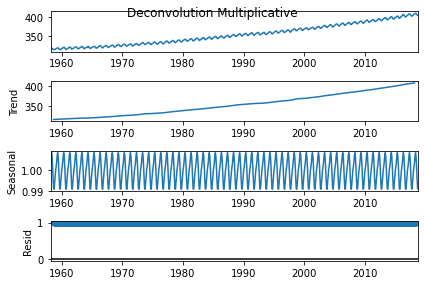

In [21]:
# Tracés des déconvolutions pour la déconvolution multiplicative
# Faites la même chose ensuite avec la déconvolution additive
series_mult.plot().suptitle('Deconvolution Multiplicative', fontsize=12)
plt.show()


count    715.000000
mean       1.000000
std        0.000858
min        0.994109
25%        0.999462
50%        1.000019
75%        1.000565
max        1.002653
Name: resid, dtype: float64


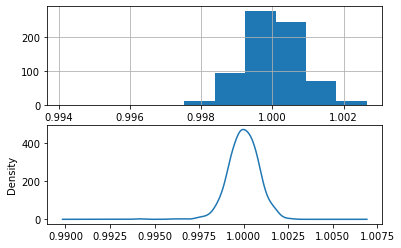

In [22]:
# Analyse des résidus

# EXPLIQUEZ CE QUI EST FAIT? QUELLE EST VOTRE CONCLUSION ? 

print(series_mult.resid.describe())
plt.figure()
plt.subplot(211)
series_mult.resid.hist(ax=plt.gca())
plt.subplot(212)
series_mult.resid.plot(kind='kde', ax=plt.gca())
# 'kde' : Kernel Density Estimate, pour tracer une estimation de la densité de probabilité 
plt.show()

# 5. Analyse de la stationnarité

In [23]:
from statsmodels.tsa.stattools import adfuller

# test de stationnarité
testADF = adfuller(series.Average)
print('Statistique ADF : %f' % testADF[0]) #statistique de test
print('P-valeur : %f' % testADF[1]) # P-valeur
print('Nombre observations : %f' % testADF[3]) 
print('Valeurs critiques :')
print(testADF[4])   # valeurs critiques pour la variable statistique

# Expliquez ce qui est affiché?

Statistique ADF : 4.568611
P-valeur : 1.000000
Nombre observations : 706.000000
Valeurs critiques :
{'1%': -3.439646367660705, '5%': -2.8656425177031375, '10%': -2.5689546724554404}


,Average
Date,
1958-03-01,NaN
1958-04-01,1.74
1958-05-01,0.05


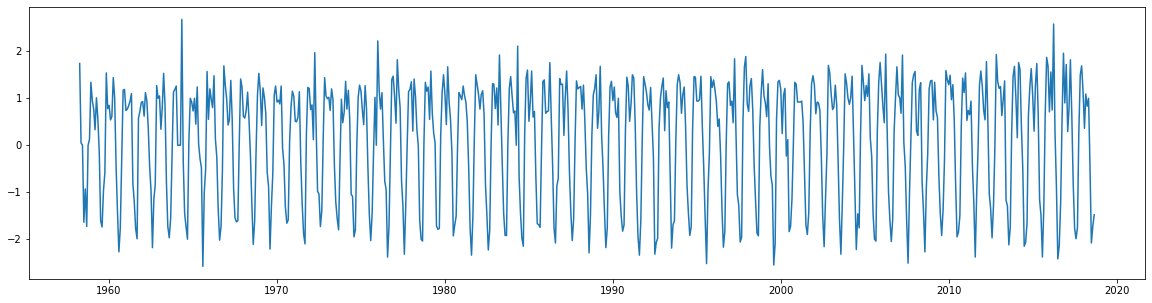

In [24]:
# On va tenter de rendre stationnaire la serie par différences. La valeur delay fixe la différence  
# utilisation de la méthode shift
delay=1
series_diff = series - series.shift(delay)

plt.figure(figsize=(20,5))
plt.plot(series_diff) 
series_diff.head(delay+2)

# Testez plusieurs valeurs de delay

In [25]:
#test de stationnarité sur la série obtenue par différences
testADF_diff = adfuller(series_diff.Average[delay:])
print('Statistique ADF : %f' % testADF_diff[0]) #statistique de test
print('P-valeur : %f' % testADF_diff[1]) # P-valeur
print('Nombre observations : %f' % testADF_diff[3]) 
print('Valeurs critiques :')
print(testADF_diff[4])   # valeurs critiques pour la variable statistique

##############
# Conclusions? 

Statistique ADF : -5.284327
P-valeur : 0.000006
Nombre observations : 705.000000
Valeurs critiques :
{'1%': -3.4396596024765795, '5%': -2.86564834926679, '10%': -2.568957779286756}


# 6. Identification - Visualisation des courbes d'Auto-corrélation 

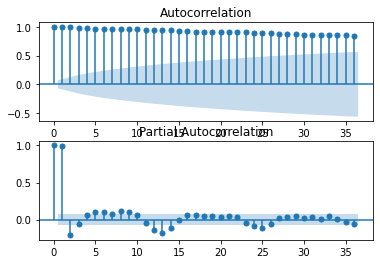

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

# ACF et PACF pour la série temporelle initiale
plt.figure()
plt.subplot(211)
plot_acf(series.Average, lags=36, ax=pyplot.gca())
plt.subplot(212)
plot_pacf(series.Average, lags=36, ax=pyplot.gca())
plt.show()

###########
# Qu'observez-vous ?

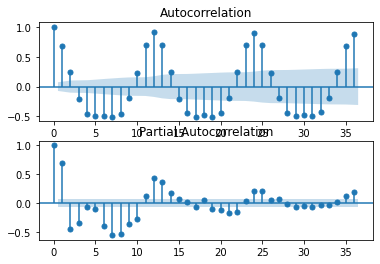

In [27]:
# ACF et PACF pour la série temporelle obtenue par différence

delay=1
series_diff = series - series.shift(delay)

plt.figure()
plt.subplot(211)
plot_acf(series_diff.Average[delay:], lags=36, ax=pyplot.gca())
plt.subplot(212)
plot_pacf(series_diff.Average[delay:], lags=36, ax=pyplot.gca())
plt.show()

###########
# Qu'observez-vous ?

# 7. Identification / Diagnostique - Apprentissage et analyse

In [28]:
# Apprentissage sur les données initiales
p=1
d=1
q=1
modele_1_fit = sm.tsa.statespace.SARIMAX(series.Average, trend='ct', order=(p,d,q))

resultat_1 = modele_1_fit.fit(disp=False)
print(resultat_1.summary())


/home/llesbats/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/llesbats/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                Average   No. Observations:                  727
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -911.440
Date:                Tue, 02 Nov 2021   AIC                           1832.881
Time:                        12:49:00   BIC                           1855.819
Sample:                    03-01-1958   HQIC                          1841.733
                         - 09-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0424      0.081      0.523      0.601      -0.117       0.201
drift       3.298e-05      0.000      0.174      0.862      -0.000       0.000
ar.L1          0.5542      0.045     12.336      0.0

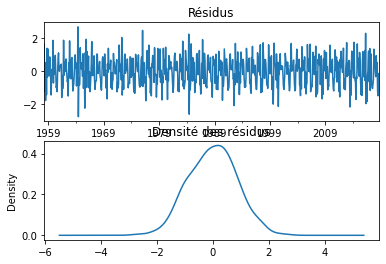

In [29]:
# Tracé des résidus pour détecter des composantes non aléatoires 
residuals = resultat_1.resid[1:] 
fig, ax = plt.subplots(2,1)
residuals.plot(title="Résidus", ax=ax[0])
residuals.plot(kind='kde', title='Densité des résidus', ax=ax[1])
plt.show()

##############
# Conclusions? 

# 8. Exploitation du modèle - Prévisions à 1 pas. 
vérfication des prévisions du modèles à partir du 01/01/2010

In [ ]:
# Utilisation du modèle : prévisions à 1 pas
#  .get_prediction (utilisée pour des données d'entrainement)
# dynamic=False pour prédiction à 1 pas


predictions = resultat_1.get_prediction(start=('2010-01-01'),dynamic=False) 
series_predites = predictions.predicted_mean

fig, ax = plt.subplots(figsize=(20,5))
ax.set(title='comparaison series et prédictions', xlabel='Date', ylabel='ppm CO2')
series.plot(ax=ax, style='b-', label='Valeurs observées')
series_predites.loc['2000-01-01':].plot(ax=ax, style='r--', label='Prédiction à 1 pas')
plt.legend(loc='upper left', fontsize=16)
plt.show

# 9. Exploitation du modèle - Prévisions multi-pas 
vérfication des prévisions du modèles à partir du 01/01/2010

In [ ]:
# Utilisation du modèle : simulation sur plus longue durée
#  .get_prediction
# dynamic=True pour prédiction sur plusieurs pas

simulations = resultat_1.get_prediction(start='2010-01-01',dynamic=True)

series_simulees = simulations.predicted_mean

fig, ax = plt.subplots(figsize=(20,5))
ax.set(title='comparaison series et simulation', xlabel='Date', ylabel='ppm CO2')
series.plot(ax=ax, style='b-', label='Valeurs observées')
series_simulees.plot(ax=ax, style='r--', label='Simulation')
plt.legend(loc='upper left', fontsize=18)
plt.show()

# 10. Exploitation du modèle - Prévisions multi-pas futures
On va supposer qu'on est le 01/01/2000. 
Un nouveau modèle va être construit à partir uniquement des données antérieures à cette date. Les prévisions seront faites pour la période entre 2000 et 2020.

In [ ]:
# .get_forecast (utilisée pour des données non vues à l'entrainement)
# (steps=N) : N pas simulés

# Choix des donnée pour le learning data set et le test data set
series_train = series.loc[:'1999']
series_test = series.loc['2000':]

# Construction du modèle avec series_train
modele_2 = sm.tsa.statespace.SARIMAX(series_train, trend='ct', order=(p,d,q))
resultat_2 = modele_2.fit(disp=False)

# Utilisation du modèle pour les prévisions 2000-2020
# 20 ans = 240 mois
predict_2_dynamic = resultat_2.get_forecast(steps=240) 


# Affichage des prévision 2000-2020 et des vraies valeurs
fig, ax = plt.subplots(figsize=(20,5))
ax.set(title='comparaison series et prédictions', xlabel='Date', ylabel='ppm CO2')
series_test.plot(ax=ax, style='b-', label='Observed')
predict_2_dynamic.predicted_mean.loc['2000-01-01':].plot(ax=ax, style='g', label='Simulation')
legend = ax.legend(loc='lower right')
plt.show


# 11. Utilisation de la fonction SARIMAX avec saisonnalité (optionnel)


In [ ]:
# MODELE DE TYPE SARIMA : ajout d'une composante saisonnière avec seasonal_order=(P,D,Q,s) 
# ordres pour la composante saisonnière : 
# s (Période saisonnière) : nombre de périodes de la série après lesquelles un modèle saisonnier est répété
# D (composante saisonnière I) : nombre de différenciation saisonnières doivent être calculées pour rendre la série stationnaire.
# Q (composante saisonnière MA) : effet des résidus passés sur les observations actuelles avec un multiple de s
# P (composante AR saisonnière) : décalages passés séparés du décalage actuel par des multiples de s 


# Choix des paramètres : 
# p : A partir du graphique PACF, p = nombre de décalages significatifs.
# d : nombre d'opérations de différenciation pour convertir la série en stationnaire.
# q : A partir du graphique ACF, q = nombre de décalages significatifs.
# s : nombre de décalages après lesquels un certain modèle saisonnier est observé.
# P : A partir du graphique PACF, P = nombre de décalages significatifs séparés par des multiples de s.
# D : nombre de différences saisonnières nécessaires pour convertir la série en stationnaire.
# Q : A partir du graphique ACF, Q = nombre de décalages significatifs séparés par des multiples de s.

# Construction et évaluation du modèle
p=1
d=1
q=1
P=1
D=1
Q=1
S=1
modele_3 = sm.tsa.statespace.SARIMAX(series.Average, order=(p,d,q), seasonal_order=(P,D,Q,S))
resultat_3 = modele_3.fit(disp=False)
print(resultat_3.summary())

In [ ]:
# Utilisation du modèle : simulation longue durée sur 50 ans (12*50 = 600)

simulation_3 = resultat_3.get_forecast(steps=600) 

# sauvegarde du resultat
series_sim_50 = simulation_3.predicted_mean

# Calcul interval de confiance
series_sim_50_int_confiance = simulation_3.conf_int()

# tracé
fig, ax = plt.subplots(figsize=(20,5))
ax.set(title='comparaison series et simulation', xlabel='Date', ylabel='ppm CO2')
series.plot(ax=ax, style='b-', label='Valeurs observées')
series_sim_50.plot(ax=ax, style='r--', label='Simulation')
ax.fill_between(series_sim_50_int_confiance.index,
                series_sim_50_int_confiance.iloc[:, 0],
                series_sim_50_int_confiance.iloc[:, 1], color='k', alpha=.25)
plt.legend(loc='upper left', fontsize=18)
plt.show()

